In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re


In [3]:
def group_lists(lst, func):
    groups = {}
    for item in lst:
        key = func(item)
        if key not in groups:
            groups[key] = []
        groups[key].append(item)
    return groups


Problem 1, SA, RC 1: [0, -1, 0, 0, 0]
Problem 2, SA, RC 1: [0, 0, 0, 0, 0]
Problem 2, SA, RC 2: [-4, -1, 0, -4, -4]
Problem 3, SA, RC 1: [0, 0, 0, 0, 0]
Problem 3, SA, RC 2: [0, 0, 0, 0, 0]
Problem 3, SA, RC 3: [0, 0, 0, 0, 0]
Problem 3, SA, RC 4: [0, 0, 0, 0, 0]
Problem 1, HC, RC 1: [-1, -1, 0, 0, 0]
Problem 2, HC, RC 1: [-2, 0, -2, 0, 0]
Problem 2, HC, RC 2: [-8, -7, -7, -7, -3]
Problem 3, HC, RC 1: [0, 0, 0, 0, 0]
Problem 3, HC, RC 2: [0, 0, 0, 0, 0]
Problem 3, HC, RC 3: [0, 0, 0, 0, 0]
Problem 3, HC, RC 4: [0, 0, 0, 0, 0]


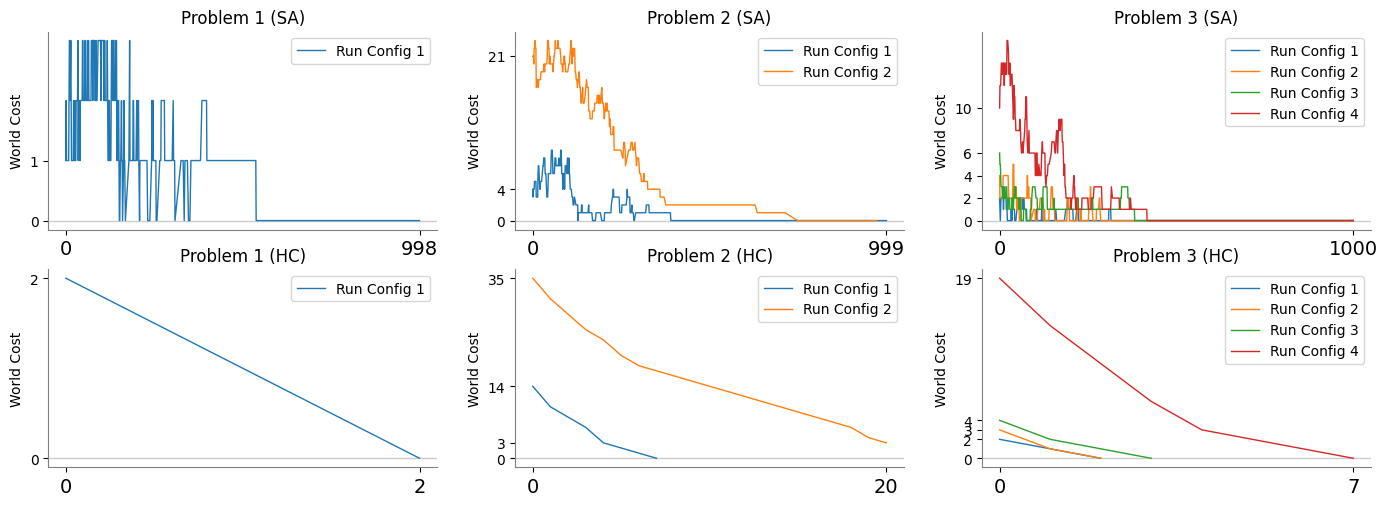

In [9]:
# Setup all figure and axes
palette = sns.color_palette()
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.rcParams['xtick.labelsize'] = 14

# Loop over and initialize all axes
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')
        ax.axhline(0, color="#cccccc", linewidth=1)

        # Calculate data path prefix and find all files
        path = f"{[ 'sa', 'hc' ][i]}_p{j + 1}_"
        files = [ f for f in os.listdir("half") if f.startswith(path) ]
        run_configs = group_lists(files, lambda f: re.search(r".*rc([0-9]).*", f).group(1))

        # Find best run for each run config
        plotted_dfs = []
        for rc in run_configs:
            rc_dfs = []
            for k, filename in enumerate(run_configs[rc]):
                rc_dfs.append(pd.read_csv(f"half/{filename}"))
            best_df = rc_dfs[np.argmax([ df["Fitness"].max() for df in rc_dfs ])]

            max_fitnesses = [ df["Fitness"].max() for df in rc_dfs ]
            print(f"Problem {j + 1}, {['SA', 'HC'][i]}, RC {rc}: {max_fitnesses}")

            # Plot world cost as -fitness
            best_df["Fitness"] *= -1
            color = palette[int(rc) - 1]
            label = f"Run Config {rc}"
            sns.lineplot(data=best_df, x="Iteration", y="Fitness", ax=ax, color=color, linewidth=1, label=label, errorbar=None)
            plotted_dfs.append(best_df)

        # Set yticks to include min and max of each df
        yticks = set()
        for df in plotted_dfs:
            yticks.add(df["Fitness"].iloc[0])
            yticks.add(df["Fitness"].iloc[-1])
        
        ax.set_title(f"Problem {j + 1} ({['SA', 'HC'][i]})")
        ax.set_xticks([0, max([ df["Iteration"].max() for df in plotted_dfs ]) ])
        ax.set_yticks(list(yticks))
        ax.set_xlabel("")
        ax.set_ylabel("World Cost")

plt.show()


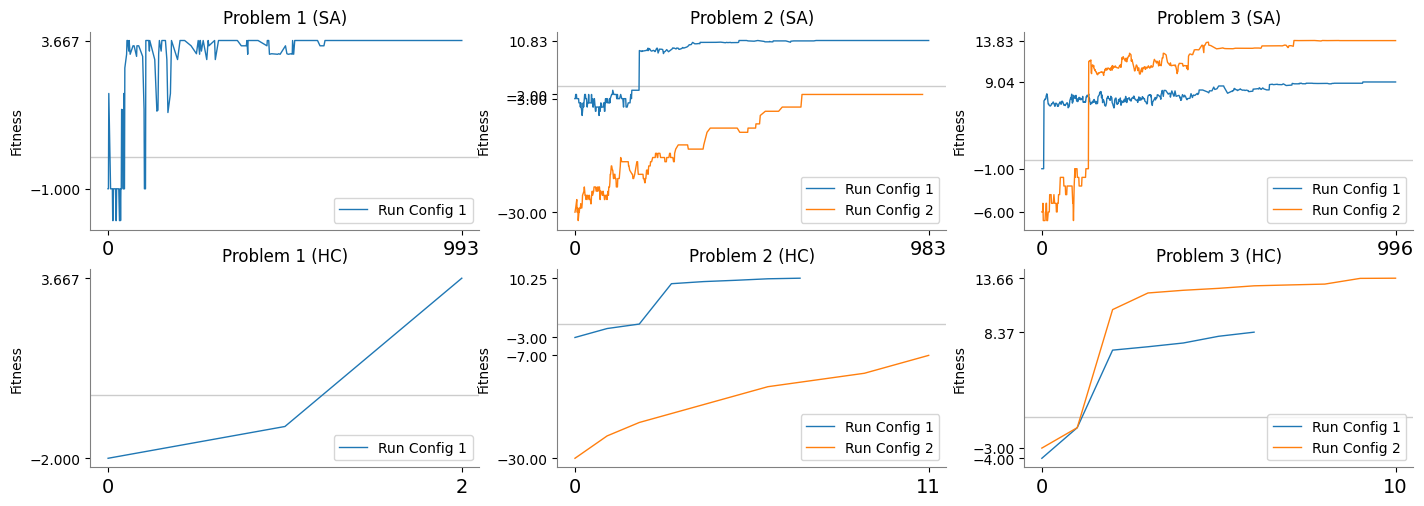

In [30]:
# Setup all figure and axes
palette = sns.color_palette()
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Loop over and initialize all axes
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')
        ax.axhline(0, color="#cccccc", linewidth=1)

        # Calculate data path prefix and find all files
        path = f"{[ 'sa', 'hc' ][i]}_p{j + 1}_"
        files = [ f for f in os.listdir("full") if f.startswith(path) ]
        run_configs = group_lists(files, lambda f: re.search(r".*rc([0-9]).*", f).group(1))

        # Find best run for each run config
        plotted_dfs = []
        for rc in run_configs:
            rc_dfs = []
            for k, filename in enumerate(run_configs[rc]):
                rc_dfs.append(pd.read_csv(f"full/{filename}"))
            best_df = rc_dfs[np.argmax([ df["Fitness"].max() for df in rc_dfs ])]

            # Plot fitness and max fitness
            color = palette[int(rc) - 1]
            label = f"Run Config {rc}"
            sns.lineplot(data=best_df, x="Iteration", y="Fitness", ax=ax, color=color, linewidth=1, label=label, errorbar=None)
            plotted_dfs.append(best_df)

        # Put legend in bottom right
        ax.legend(loc="lower right")

        # Set yticks to include min and max of each df
        yticks = set()
        for df in plotted_dfs:
            yticks.add(df["Fitness"].iloc[0])
            yticks.add(df["Fitness"].iloc[-1])
        
        ax.set_title(f"Problem {j + 1} ({['SA', 'HC'][i]})")
        ax.set_xticks([0, max([ df["Iteration"].max() for df in plotted_dfs ]) ])
        ax.set_yticks(list(yticks))
        ax.set_xlabel("")
        ax.set_ylabel("Fitness")

plt.show()


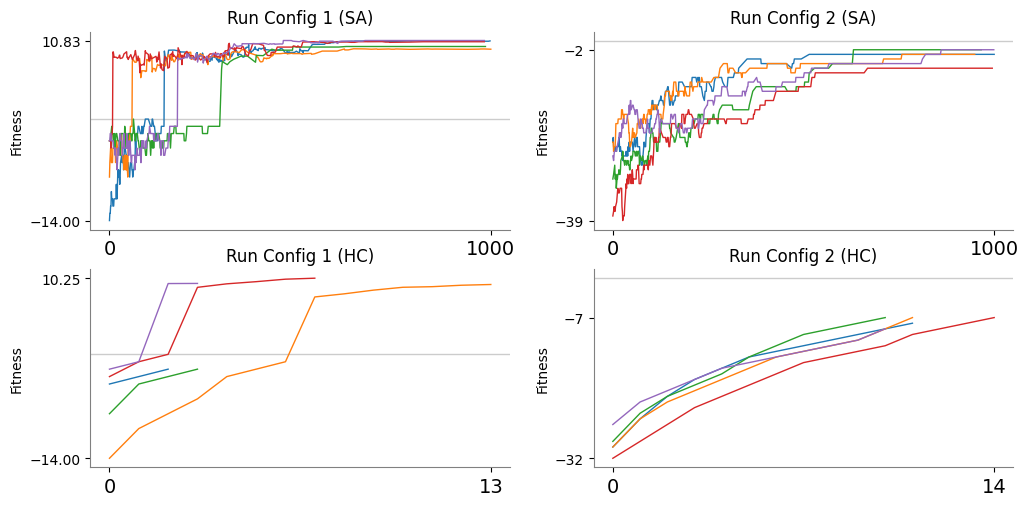

In [32]:
# Setup all figure and axes
palette = sns.color_palette()
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Loop over and initialize all axes
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')
        ax.axhline(0, color="#cccccc", linewidth=1)
        ax.set_title(f"Run Config {j+1} ({['SA', 'HC'][i]})")

        # Calculate data path prefix and find all files
        path = f"{[ 'sa', 'hc' ][i]}_p2_rc{j+1}"
        files = [ f for f in os.listdir("full") if f.startswith(path) ]
        run_configs = group_lists(files, lambda f: re.search(r".*rc([0-9]).*", f).group(1))

        # Plot all runs for each run config
        plotted_dfs = []
        for rc in run_configs:
            rc_dfs = []
            for k, filename in enumerate(run_configs[rc]):
                df = pd.read_csv(f"full/{filename}")
                sns.lineplot(data=df, x="Iteration", y="Fitness", ax=ax, color=palette[k], linewidth=1, errorbar=None)
                plotted_dfs.append(df)

        ax.set_xticks([0, max([ df["Iteration"].max() for df in plotted_dfs ]) ])
        ax.set_yticks([
            min([ df["Fitness"].min() for df in plotted_dfs ]),
            max([ df["Fitness"].max() for df in plotted_dfs ])
        ])
        ax.set_xlabel("")
        ax.set_ylabel("Fitness")

plt.show()
